# LLC_Results

In [1]:
%matplotlib inline

In [2]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.models import io as model_io
from ulmo.modis import io as modis_io

In [3]:
os.getenv('ENDPOINT_URL')

'https://s3.nautilus.optiputer.net'

In [4]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

# Load table

In [5]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_uniform_r0.5_test.feather


In [6]:
llc_table['DT'] = llc_table.T90 - llc_table.T10

In [56]:
llc_table['DTxn'] = llc_table.Tmax - llc_table.Tmin

In [7]:
llc_table.head()

,lat,lon,row,col,datetime,LLC_file,pp_file,pp_root,field_size,mean_temperature,...,pp_idx,pp_type,LL,U_mean,V_mean,U_rms,V_rms,UV_mean,UV_rms,DT
0,71.725098,-177.172684,12895,10607,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.467546,...,647491,0,648.981934,-0.099179,-0.001986,0.059771,0.063255,0.141285,0.082805,0.190000
1,71.747978,-175.380554,12895,10676,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-0.492408,...,384768,0,-513.771851,-0.008606,-0.042140,0.041484,0.108360,0.046431,0.037870,4.904001
2,71.758400,-173.559555,12895,10746,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,3.271719,...,283882,0,345.448669,0.070156,-0.045817,0.022577,0.044823,0.099820,0.029986,0.958000
3,71.755905,-171.737854,12895,10816,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.945127,...,613023,0,169.709839,0.081717,-0.010355,0.024675,0.039160,0.115622,0.034708,1.146000
4,71.740822,-169.943695,12895,10885,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.364319,...,537161,0,349.981262,0.039346,0.019852,0.023803,0.031211,0.057416,0.030541,0.950000


# Plot

(0.0, 10000.0)

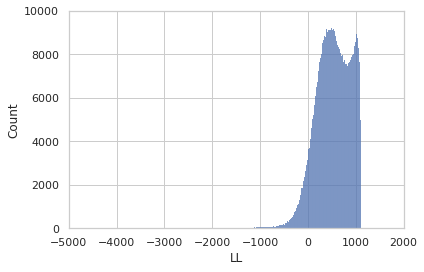

In [7]:
ax = sns.histplot(data=llc_table, x='LL')
ax.set_xlim(-5000., 2000.)
ax.set_ylim(0., 10000.)

(0.0, 100.0)

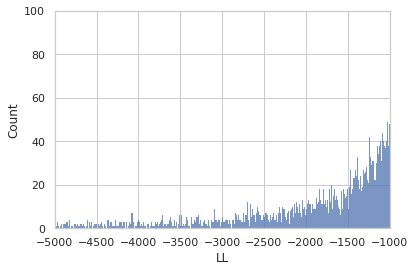

In [8]:
ax = sns.histplot(data=llc_table[np.isfinite(llc_table.LL)], x='LL')
ax.set_xlim(-5000., -1000.)
ax.set_ylim(0., 100.)

## With DT

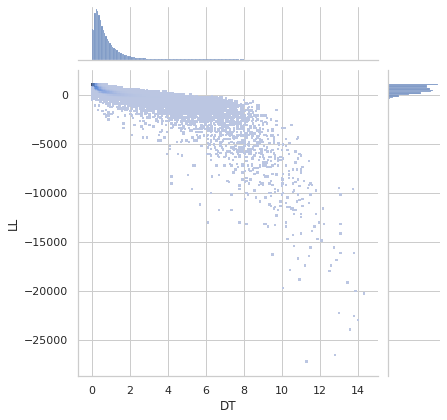

In [10]:
#fig = plt.figure(figsize=(12,12))
#ax = plt.gca()
#sns.displot(data=llc_table[np.isfinite(llc_table.LL)], x='LL', y='DT')
jg = sns.jointplot(data=llc_table, x='DT', y='LL',
    kind='hist', bins=200, marginal_kws=dict(bins=200))

----

# Spatial

## Low LL

In [11]:
low_LL = llc_table.LL < -1000.

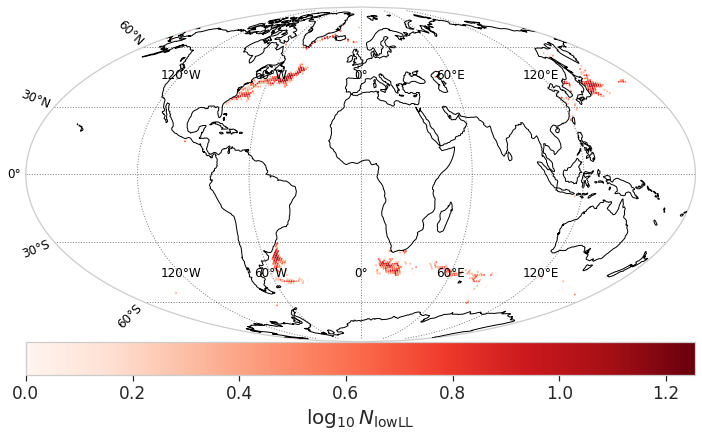

In [14]:
reload(ulmo_figs)
_ = ulmo_figs.show_spatial(llc_table[low_LL], lbl='low LL')

## High LL

In [15]:
high_LL = llc_table.LL > 400.

/home/xavier/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/xavier/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/xavier/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


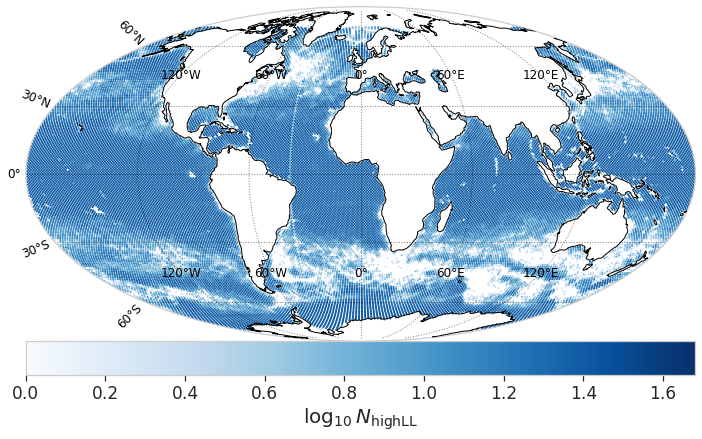

In [16]:
_ = ulmo_figs.show_spatial(llc_table[high_LL], lbl='high LL', color='Blues')

# Show one

## Aim for -4000 and high $\Delta T$

In [24]:
high_DT = llc_table.DT > 4.

In [27]:
i4000 = np.argmin(np.abs(llc_table[high_DT].LL + 4000.))
cutout = llc_table[high_DT].iloc[i4000]
cutout

lat                                                           35.3249
lon                                                          -71.7188
row                                                              9856
col                                                             15629
datetime                                          2011-11-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-11-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              21.7707
Tmin                                                           16.167
Tmax                                                           25.351
T90                                                            25.071
T10                                                            16.607
pp_idx              

## PreProc

In [21]:
pp_hf.close()

In [28]:
reload(llc_io)
img, pp_hf = llc_io.grab_image(cutout, close=False)

In [29]:
img.min(), img.max()

(-5.603691, 3.5803108)

## Show

<IPython.core.display.Javascript object>


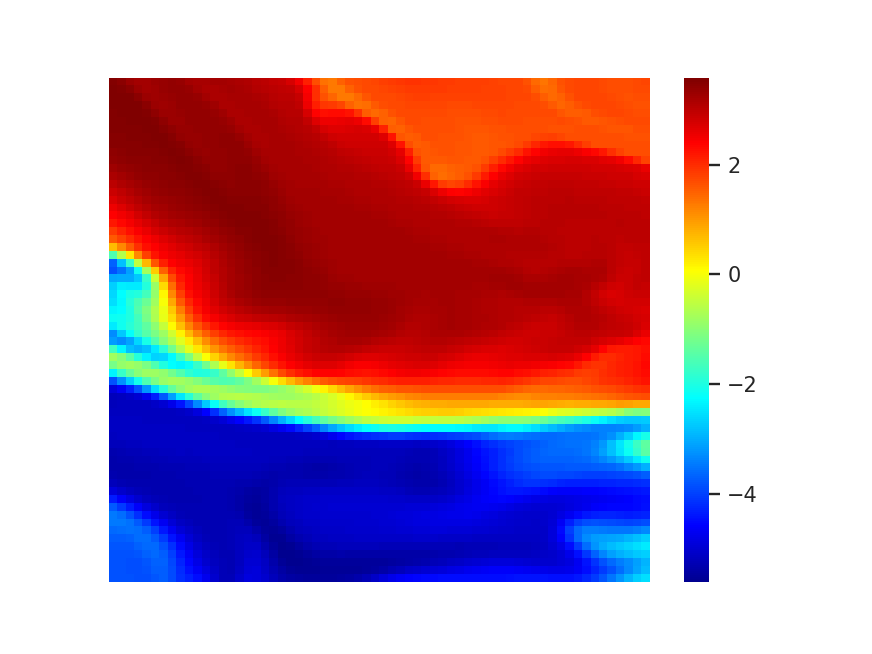

In [30]:
ax = sns.heatmap(img, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

## Now lower $\Delta T$

In [8]:
low_DT = llc_table.DT < 2.

In [32]:
i4000_low = np.argmin(np.abs(llc_table[low_DT].LL + 4000.))
llc_table[low_DT].iloc[i4000_low]

lat                                                           46.0014
lon                                                            148.76
row                                                             10587
col                                                              8932
datetime                                          2012-07-31 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2012-07-31T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              13.0478
Tmin                                                            2.798
Tmax                                                           15.061
T90                                                            14.477
T10                                                            12.814
pp_idx              

In [33]:
cutout_low = llc_table[low_DT].iloc[i4000_low]

In [34]:
img_low, _ = llc_io.grab_image(cutout_low, close=False, pp_hf=pp_hf)

<IPython.core.display.Javascript object>


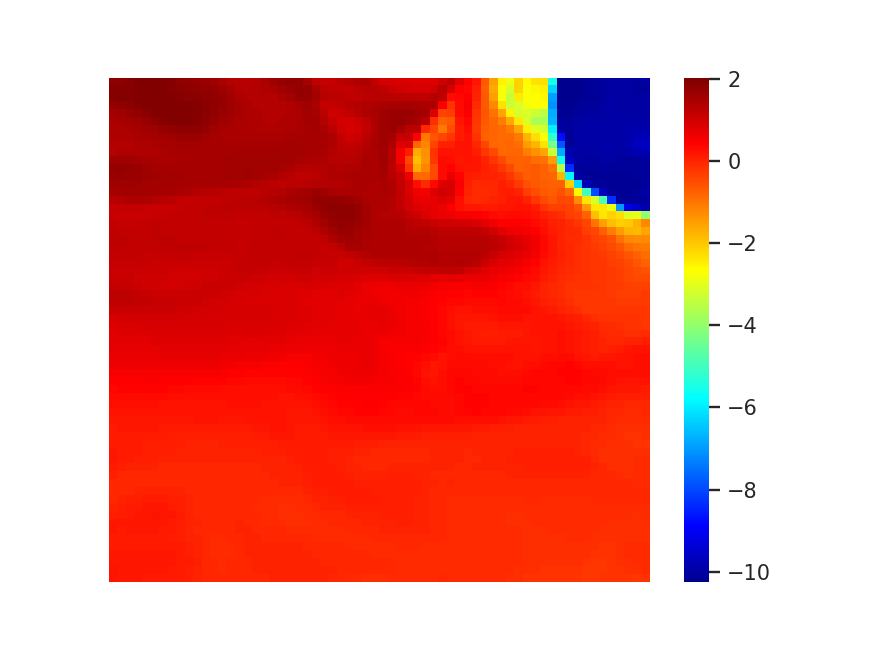

In [35]:
ax = sns.heatmap(img_low, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

# High $\Delta T$, high LL

In [9]:
i_HH = np.argmin(np.abs(llc_table[high_DT].LL - 1000.))
cutout_HH = llc_table[high_DT].iloc[i_HH]
cutout_HH

NameError: name 'high_DT' is not defined

<IPython.core.display.Javascript object>


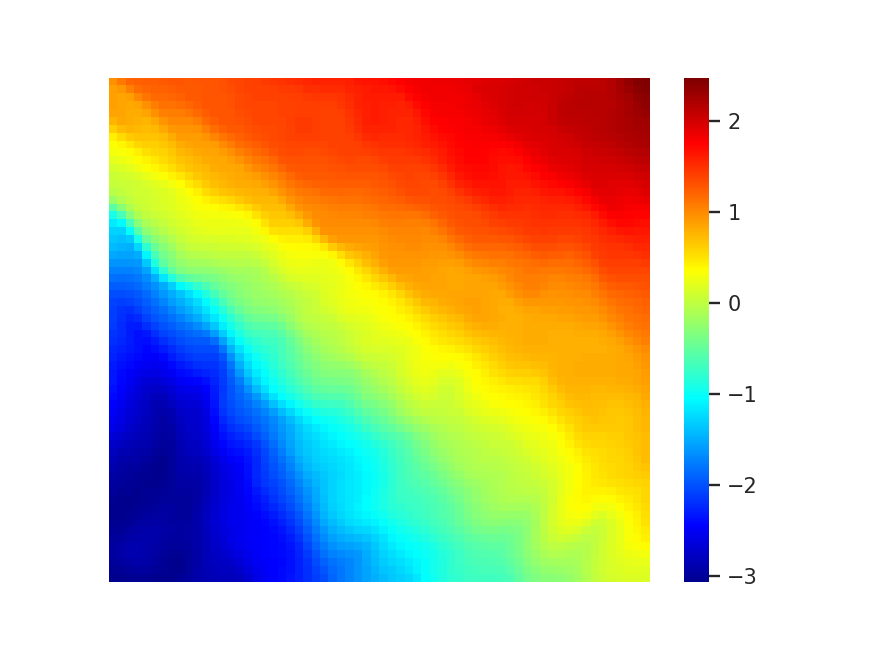

In [38]:
img_HH, _ = llc_io.grab_image(cutout_HH, close=False, pp_hf=pp_hf)
ax = sns.heatmap(img_HH, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

# Low $\Delta T$, high LL

In [10]:
i_HL = np.argmin(np.abs(llc_table[low_DT].LL - 1000.))
cutout_HL = llc_table[low_DT].iloc[i_HL]
cutout_HL

lat                                                          -7.47858
lon                                                           -138.51
row                                                              7499
col                                                             12423
datetime                                          2011-09-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                               25.846
Tmin                                                           25.651
Tmax                                                           25.958
T90                                                            25.924
T10                                                            25.776
pp_idx              

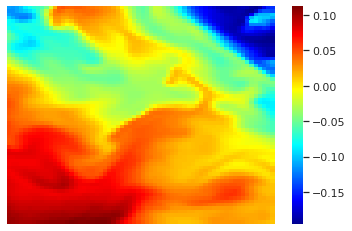

In [12]:
img_HL, _ = llc_io.grab_image(cutout_HL, close=False, pp_hf=None)#pp_hf)
ax = sns.heatmap(img_HL, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

In [13]:
cutout_HL

lat                                                          -7.47858
lon                                                           -138.51
row                                                              7499
col                                                             12423
datetime                                          2011-09-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                               25.846
Tmin                                                           25.651
Tmax                                                           25.958
T90                                                            25.924
T10                                                            25.776
pp_idx              

# Add Noise

In [35]:
noise=0.09
img_HL_noise = img_HL + np.random.normal(loc=0., scale=noise, size=(64,64))

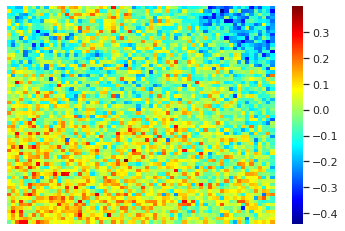

In [36]:
ax = sns.heatmap(img_HL_noise, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

## Ulmo time

In [16]:
pae = model_io.load_modis_l2(flavor='std', local=False)

Using device=cpu
Loading autoencoder model from: s3://modis-l2/Models/R2019_2010_128x128_std/autoencoder.pt
Loading flow model from: s3://modis-l2/Models/R2019_2010_128x128_std/flow.pt
scaler loaded from: s3://modis-l2/Models/R2019_2010_128x128_std/MODIS_R2019_2010_95clear_128x128_preproc_std_scaler.pkl


/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [18]:
latent, LL = pae.eval_numpy_img(img_HL)
LL

Calculating latents..
Scaling..
Probabilities now


999.9974975585938

In [25]:
latent_noise, LL_noise = pae.eval_numpy_img(img_HL_noise)
LL_noise

Calculating latents..
Scaling..
Probabilities now


553.84375

## Check MODIS

In [26]:
tbl_file = 's3://modis-l2/Tables/MODIS_L2_std.feather' # A bit slow via s3
modisl2_table = ulmo_io.load_main_table(tbl_file)

Exception ignored in: <function _ConnectionBase.__del__ at 0x7efbb1870f70>
Traceback (most recent call last):
  File "/home/xavier/Projects/anaconda3/lib/python3.8/multiprocessing/connection.py", line 132, in __del__
    self._close()
  File "/home/xavier/Projects/anaconda3/lib/python3.8/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


Read main table: s3://modis-l2/Tables/MODIS_L2_std.feather


In [49]:
modisl2_table['DT'] = modisl2_table.T90 - modisl2_table.T10

In [50]:
modisl2_table['DTxn'] = modisl2_table.Tmax - modisl2_table.Tmin

In [28]:
low_ML2_DT = modisl2_table.DT < 0.5

In [29]:
highLL_ML2 = modisl2_table.LL > 400.

In [30]:
modisl2_table[low_ML2_DT & highLL_ML2].head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx,DT
1,13.043748,-102.751816,706,2003-12-12 08:30:00,432.766724,1696,0.049805,28.924648,27.789999,29.654999,29.154999,28.695000,AQUA_MODIS.20031212T083006.L2.SST.nc,107110304377724818,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,1,0.459999
2,-18.086618,40.844833,581,2003-09-24 22:35:00,764.413086,656,0.006104,25.551611,24.775000,26.154999,25.750000,25.344999,AQUA_MODIS.20030924T223506.L2.SST.nc,106471913422084483,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,2,0.405001
11,18.458124,62.417706,709,2003-10-18 21:35:00,554.128296,816,0.000183,27.821482,27.184999,28.555000,28.070000,27.590000,AQUA_MODIS.20031018T213506.L2.SST.nc,1066108458124241771,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,11,0.480000
25,0.977460,-43.607227,837,2003-08-05 04:35:00,762.847168,144,0.001099,27.462765,26.869999,28.099998,27.674999,27.254999,AQUA_MODIS.20030805T043506.L2.SST.nc,106090977513639277,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,25,0.420000
29,-1.537805,-18.558687,613,2003-07-22 02:45:00,498.949463,80,0.007385,23.995159,22.404999,24.605000,24.184999,23.814999,AQUA_MODIS.20030722T024506.L2.SST.nc,105888462216144131,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,29,0.370001


In [31]:
cutout_M = modisl2_table[low_ML2_DT & highLL_ML2].iloc[3]
cutout_M

lat                                                           0.97746
lon                                                          -43.6072
col                                                               837
datetime                                          2003-08-05 04:35:00
LL                                                            762.847
row                                                               144
clear_fraction                                             0.00109863
mean_temperature                                              27.4628
Tmin                                                            26.87
Tmax                                                             28.1
T90                                                            27.675
T10                                                            27.255
filename                         AQUA_MODIS.20030805T043506.L2.SST.nc
UID                                                106090977513639277
pp_file             

In [33]:
img_modis = modis_io.grab_image(cutout_M)

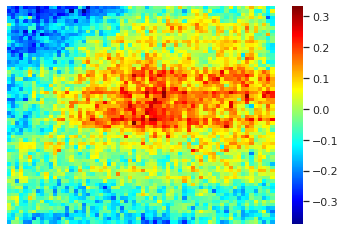

In [34]:
ax = sns.heatmap(img_modis, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

In [37]:
_, LL_modis = pae.eval_numpy_img(img_modis)
LL_modis

Calculating latents..
Scaling..
Probabilities now


762.848876953125

In [38]:
LL_200 = np.abs(modisl2_table.LL-200.) < 10.

In [39]:
modisl2_table[low_ML2_DT & LL_200].head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx,DT
5361,-37.182365,171.882690,581,2003-10-18 13:35:00,207.348145,1232,0.019226,14.870512,12.550000,15.509999,15.099999,14.650000,AQUA_MODIS.20031018T133505.L2.SST.nc,106652817635188269,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,5361,0.450000
9907,22.938490,-118.294570,453,2003-02-01 09:30:00,199.846558,1104,0.000000,20.026115,18.959999,21.529999,20.270000,19.779999,AQUA_MODIS.20030201T093006.L2.SST.nc,104411293856170543,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,9907,0.490002
21727,37.561165,7.687149,485,2003-02-08 01:20:00,206.092896,261,0.046814,13.907197,11.684999,14.545000,14.177617,13.684999,AQUA_MODIS.20030208T012005.L2.SST.nc,1044127561218768715,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,21727,0.492618
22090,-24.649115,5.316186,869,2003-09-01 01:05:00,209.172180,592,0.031738,17.373955,13.235000,18.125000,17.615000,17.154999,AQUA_MODIS.20030901T010506.L2.SST.nc,106265350918531619,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,22090,0.460001
28751,-31.238691,177.183980,773,2003-05-20 13:30:00,193.754395,48,0.018372,20.089474,17.684999,20.984999,20.359999,19.865000,AQUA_MODIS.20030520T133005.L2.SST.nc,105358761335718398,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,28751,0.494999


In [46]:
cutout_M2 = modisl2_table[low_ML2_DT & LL_200].iloc[5]
cutout_M2

lat                                                          -16.6514
lon                                                          -136.801
col                                                               709
datetime                                          2003-09-05 10:30:00
LL                                                            204.369
row                                                              1208
clear_fraction                                              0.0497437
mean_temperature                                               25.918
Tmin                                                           23.505
Tmax                                                           26.555
T90                                                             26.17
T10                                                            25.675
filename                         AQUA_MODIS.20030905T103006.L2.SST.nc
UID                                                 10627334864319890
pp_file             

In [47]:
img_modis2 = modis_io.grab_image(cutout_M2)

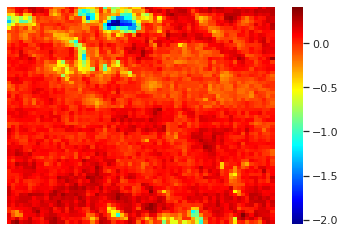

In [48]:
ax = sns.heatmap(img_modis2, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

## Scatter

(-2000.0, 1100.0)

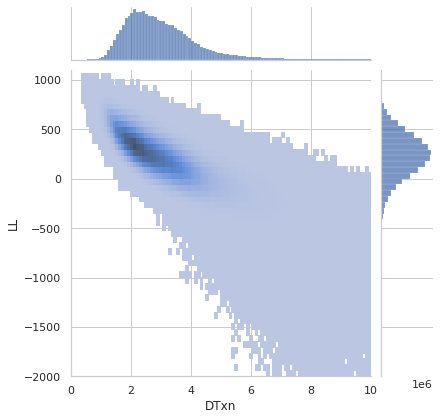

In [55]:
jg = sns.jointplot(data=modisl2_table, x='DTxn', y='LL',
    kind='hist', bins=200, marginal_kws=dict(bins=200))
#
jg.ax_joint.set_xlim(0., 10.)
jg.ax_joint.set_ylim(-2000., 1100.)

## LLC

(0.0, 1300.0)

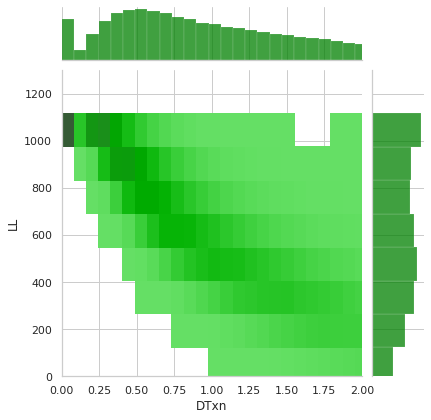

In [71]:
jg = sns.jointplot(data=llc_table, x='DTxn', y='LL', color='green',
    kind='hist', bins=200, marginal_kws=dict(bins=200))
#
jg.ax_joint.set_xlim(0., 2.)
jg.ax_joint.set_ylim(0., 1300.)

In [62]:
zro_DTxn = llc_table.DTxn < 0.1
np.sum(zro_DTxn)

33210

In [63]:
llc_table[zro_DTxn].head()

,lat,lon,row,col,datetime,LLC_file,pp_file,pp_root,field_size,mean_temperature,...,pp_type,LL,U_mean,V_mean,U_rms,V_rms,UV_mean,UV_rms,DT,DTxn
60,71.321228,172.102676,12895,10187,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.500672,...,0,1103.890259,0.048647,-0.140489,0.005841,0.014272,0.068797,0.008261,0.033,0.070000
77,71.007851,-102.419388,12895,14323,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.421458,...,0,1108.992188,0.079301,-0.006885,0.009016,0.007865,0.112173,0.012536,0.026,0.053000
78,71.091721,-101.326820,12895,14368,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.435853,...,0,1100.749512,0.108865,-0.033641,0.031377,0.034011,0.153958,0.044374,0.053,0.095000
115,71.274727,172.052307,12890,10184,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.502277,...,0,1097.237549,0.048885,-0.145321,0.006936,0.016650,0.069133,0.009808,0.031,0.082999
133,71.007851,-102.419388,12895,14323,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.421458,...,0,1108.992188,0.079301,-0.006885,0.009016,0.007865,0.112173,0.012536,0.026,0.053000


In [64]:
cutout_0T = llc_table[zro_DTxn].iloc[1]
cutout_0T

lat                                                           71.0079
lon                                                          -102.419
row                                                             12895
col                                                             14323
datetime                                          2011-09-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                             -1.42146
Tmin                                                           -1.459
Tmax                                                           -1.406
T90                                                             -1.41
T10                                                            -1.436
pp_idx              

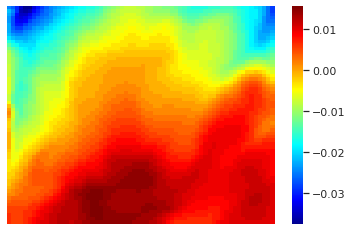

In [69]:
reload(plotting)
reload(llc_plotting)
reload(llc_plotting.plotting)
llc_plotting.show_cutout(cutout_0T)

----

# Debugin

In [86]:
pp_file = 's3://llc/PreProc/LLC_uniform_test_preproc.h5'

In [87]:
pp_hf.close()

In [88]:
f=ulmo_io.open(pp_file, 'rb')
pp_hf = h5py.File(f, 'r')

In [100]:
img3 = pp_hf['valid'][189772, 0, ...]

<AxesSubplot:>

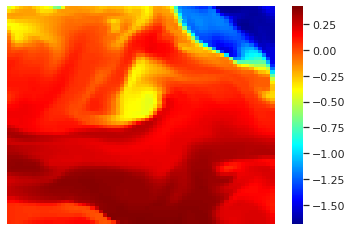

In [101]:
pal, cm = plotting.load_palette()
sns.heatmap(img3, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

In [29]:
i4000

219001

## Local

In [30]:
pp_file_local = '/data/Projects/Oceanography/AI/OOD/LLC/PreProc/LLC_uniform_preproc_test.h5'

In [33]:
with ulmo_io.open(pp_file_local, 'rb') as f:
    pp_hf_l = h5py.File(f, 'r')
    img_l = pp_hf_l['valid'][i4000, 0, ...]

<AxesSubplot:>

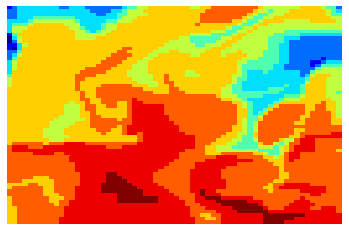

In [34]:
pal, cm = plotting.load_palette()
sns.heatmap(img_l, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=False)

## Correct answer

In [54]:
sdate = str(cutout.datetime).replace(':','_')[:19]
sdate

'2011-11-30 00_00_00'

In [58]:
sdate[10] = 'T'

TypeError: 'str' object does not support item assignment

In [62]:
reload(llc_io)
dfile = llc_io.grab_llc_datafile(cutout.datetime, local=True)
dfile

'/data/Projects/Oceanography/data/LLC/ThetaUVSalt/LLC4320_2011-11-30T00_00_00.nc'

In [65]:
ds = xarray.open_dataset(dfile)
ds

<xarray.Dataset>
Dimensions:  (i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_l: 1)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Dimensions without coordinates: k_l
Data variables:
    Theta    (j, i) float32 ...
    U        (j, i_g) float32 ...
    V        (j_g, i) float32 ...
    W        (k_l, j, i) float32 ...
    Salt     (j, i) float32 ...

In [66]:
sst = ds.Theta.values

In [69]:
sst.shape

(12960, 17280)

In [70]:
cutout

lat                                                          -29.9971
lon                                                           74.8854
row                                                              6249
col                                                              5386
datetime                                          2011-11-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-11-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              20.5525
Tmin                                                           19.154
Tmax                                                           21.679
T90                                                            21.185
T10                                                            19.829
Name: 219001, dtype:

In [67]:
img7 = sst[cutout.row:cutout.row+64, cutout.col:cutout.col+64]
img7.shape

(64, 64)

<AxesSubplot:>

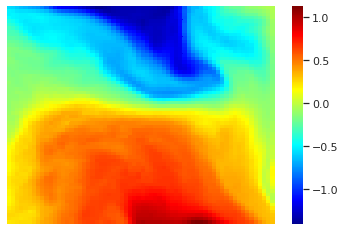

In [72]:
pal, cm = plotting.load_palette()
sns.heatmap(img7-np.mean(img7), xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

## Local Preproc

In [73]:
local_pp = '/data/Projects/Oceanography/AI/OOD/LLC/PreProc/LLC_uniform_test_preproc.h5'

In [74]:
lpp_h5 = h5py.File(local_pp, 'r')

In [75]:
lpp_h5.keys()

<KeysViewHDF5 ['valid', 'valid_metadata']>

In [78]:
meta = lpp_h5['valid_metadata']
df_pp = pandas.DataFrame(meta[:].astype(np.unicode_))#, columns=meta.attrs['columns'])

In [79]:
df_pp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.515810012817383,-49.92708206176758,8867,16675,2012-07-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-07-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,26.77527618408203,26.400001525878906,26.970001220703125,26.916000366210938,26.483001708984375
1,-39.73479461669922,178.2395782470703,5630,10347,2011-09-30 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,12.325772285461426,11.689000129699707,12.921000480651855,12.784000396728516,11.935999870300293
2,-53.96160888671875,-23.65625,4556,656,2012-05-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-05-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.466836452484131,1.3999996185302734,3.8269996643066406,3.36799955368042,1.8379993438720703
3,2.388246774673462,160.65625,8011,9503,2012-03-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,28.45553970336914,28.32000160217285,28.556001663208008,28.511001586914062,28.40300178527832
4,42.21384811401367,151.3020782470703,10315,9054,2011-09-30 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,18.08561134338379,16.880001068115234,19.020999908447266,18.618999481201172,17.26799964904785


In [80]:
df_pp.iloc[i4000]

0                                    -56.25566101074219
1                                    -146.8645782470703
2                                                  4355
3                                                 12022
4                                   2011-09-30 00:00:00
5     s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
6          s3://llc/PreProc/LLC_uniform_test_preproc.h5
7                                               llc_std
8                                                    64
9                                 -0.014142334461212158
10                                   -1.082000732421875
11                                    1.984999656677246
12                                    1.371999740600586
13                                  -0.9550008773803711
Name: 219001, dtype: object

In [81]:
meta.attrs['columns']

array(['lat', 'lon', 'row', 'col', 'datetime', 'LLC_file', 'pp_file',
       'pp_root', 'field_size', 'mean_temperature', 'Tmin', 'Tmax', 'T90',
       'T10', 'Tmin', 'Tmax', 'T90', 'T10'], dtype=object)

In [82]:
llc_table.columns

Index(['lat', 'lon', 'row', 'col', 'datetime', 'LLC_file', 'pp_file',
       'pp_root', 'field_size', 'mean_temperature', 'Tmin', 'Tmax', 'T90',
       'T10'],
      dtype='object')

In [85]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_table = ulmo_io.load_main_table(tbl_file)

----

# Testing

In [7]:
llc_table.to_csv('/home/xavier/test_uniform_r0.5_test.csv', date_format='%Y-%m-%d %H:%M:%S')